# Generating plots for the documentation

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import qp
import matplotlib

%config InlineBackend.figure_formats = ['svg']
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.axis'] = 'y'
matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['axes.facecolor'] = 'none'
matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.top'] = False

matplotlib.rcParams['ytick.left'] = False
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.major.size'] = 6

matplotlib.rcParams['grid.linewidth'] = 0.5
matplotlib.rcParams['grid.color'] = '#cccccc'

matplotlib.rcParams['xtick.major.width'] = 0.5
matplotlib.rcParams['xtick.minor.width'] = 0.5
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['ytick.alignment'] = "center_baseline"
matplotlib.rcParams['ytick.major.pad'] = 0
matplotlib.rcParams['ytick.labelleft'] = True
matplotlib.rcParams['ytick.labelright'] = False
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['axes.xmargin'] = 0.1
matplotlib.rcParams['axes.ymargin'] = 0.1
matplotlib.rcParams['legend.frameon'] = False
matplotlib.rcParams['legend.loc'] = 'upper right'
matplotlib.rcParams['axes.titleweight'] = 'bold'
matplotlib.rcParams['axes.titlelocation'] = 'left'
matplotlib.rcParams['axes.titlepad'] = 12
matplotlib.rcParams['legend.borderaxespad'] = 0
matplotlib.rcParams['yaxis.labellocation'] = 'center'

matplotlib.rcParams['font.sans-serif'] = 'Lato'

In [2]:
xvals= np.array([0,0.5,1,1.5,2])
yvals = np.array([[0.01, 0.2,0.3,0.2,0.01],[0.09,0.25,0.2,0.1,0.01]])
ancil = {'ids':[5,8]}
ens = qp.interp.create_ensemble(xvals, yvals,ancil=ancil)

In [71]:
bins = np.linspace(np.min(xvals)-0.2,np.max(xvals)+0.2,16)
ens_h = qp.convert(ens,"hist", bins=bins)

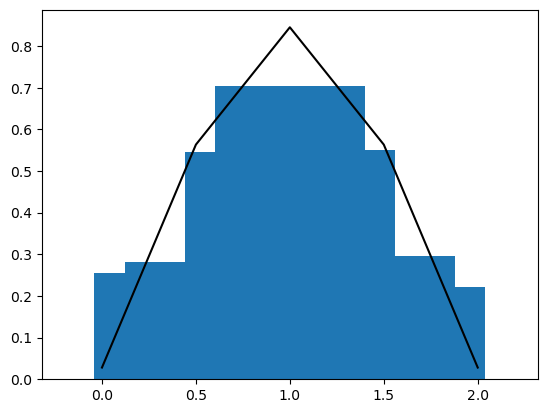

In [72]:

plt.bar(ens_h.x_samples(), ens_h[0].objdata["pdfs"],width=ens_h.x_samples()[1]- ens_h.x_samples()[0])
plt.plot(ens.x_samples(), ens[0].pdf(ens.x_samples()),c='k')

In [10]:
npdf = 3
nvals = 50
xvals2 = np.linspace(-1,5.,nvals)
loc = np.expand_dims(np.linspace(1, 2., npdf),-1)
scale=np.expand_dims(np.linspace(0.2, 1.15, npdf),-1)
norm_yvals = stats.norm(loc=loc, scale=scale).pdf(xvals2)

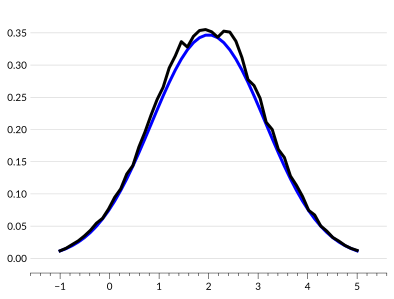

In [ ]:
plt.plot(xvals2,norm_yvals[2],c='b')

In [11]:
ens_i = qp.interp.create_ensemble(xvals=xvals2,yvals=norm_yvals)

In [13]:
test = ens_i.rvs(10)
test.shape

(3, 10)

In [51]:
bins = np.linspace(-1,5,26)
ens_h = qp.convert(ens_i, "hist", bins=bins)

In [101]:
colours = ["#2980B9", "#331E38"]

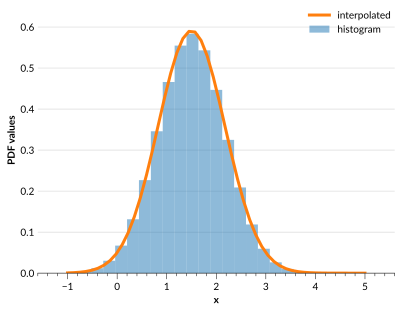

In [ ]:
plt.bar(ens_h.x_samples(),ens_h[1].objdata["pdfs"], width=ens_h.x_samples()[1]-ens_h.x_samples()[0], alpha=0.5,label="histogram")
plt.plot(ens_i.metadata["xvals"],ens_i[1].objdata["yvals"], c='C1',label="interpolated")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("PDF values")
#plt.savefig("../assets/basic_usage_convert_comparison.svg",transparent=True)

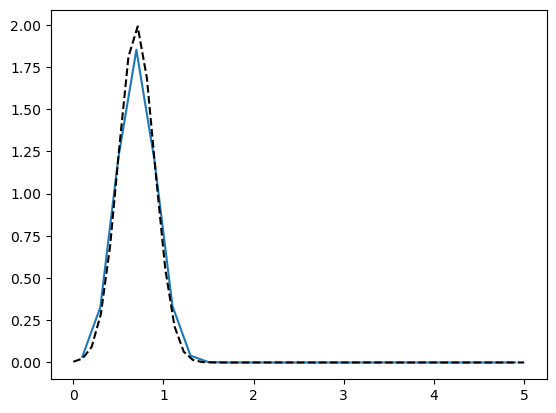

In [106]:
plt.plot(ens_h.x_samples(),ens_h[0].pdf(ens_h.x_samples()))
plt.plot(ens_i.x_samples(),ens_i[0].pdf(ens_i.x_samples()), c='k', linestyle="--")

In [54]:
ens_h.pdf(1.2)

array([[0.81902906],
       [0.55474111],
       [0.28733705]])

In [55]:
ens_i.pdf(1.2)

array([[1.20683683],
       [0.53529521],
       [0.27484342]])

In [108]:
ens_i

Ensemble(the_class=interp,shape=(3, 50))

In [114]:
ens_i.metadata["pdf_name"]

array([b'interp'], dtype='|S6')

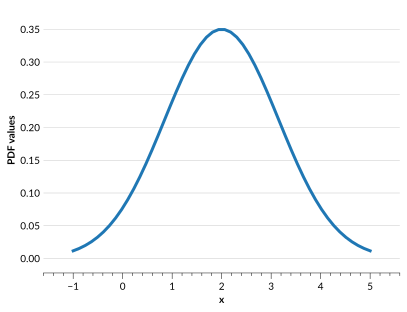

In [53]:
plt.plot(ens_i.metadata["xvals"],ens_i.objdata["yvals"][2])
plt.xlabel("x")
plt.ylabel("PDF values")
plt.savefig("../assets/basic_usage_plot_data.svg",transparent=True)

In [125]:
ens_h.metadata["bins"][-1]

np.float64(5.0)

In [16]:
ens_n = qp.stats.norm.create_ensemble({"loc": 2.5, "scale": 1.})
s_n = stats.norm(loc=2.5, scale=1)

Text(0, 0.5, '$P(X)$')

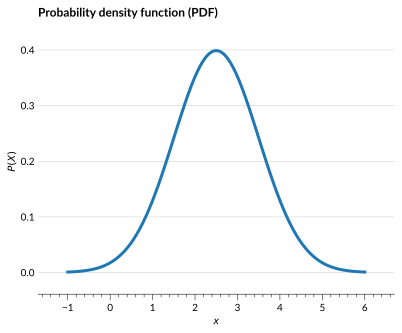

In [4]:
x = np.linspace(-1,6,100)
plt.plot(x, s_n.pdf(x))
plt.title("Probability density function (PDF)")
plt.xlabel(r"$x$")
plt.ylabel(r"$P(X)$")
#plt.savefig("../assets/primer-PDF-norm.svg", transparent=True)

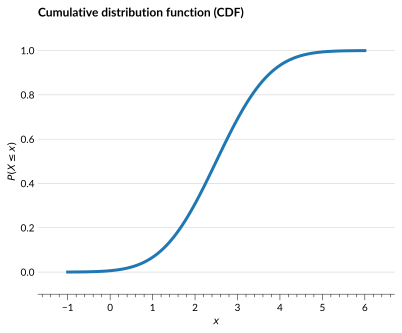

In [ ]:
plt.plot(x, s_n.cdf(x))
plt.title("Cumulative distribution function (CDF)")
plt.xlabel(r"$x$")
plt.ylabel(r"$P(X \leq x)$")
#plt.savefig("../assets/primer-CDF-norm.svg", transparent=True)

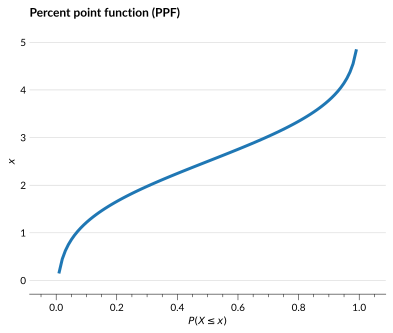

In [ ]:
p = np.linspace(0,1,100)
plt.plot(p, s_n.ppf(p))
plt.title("Percent point function (PPF)")
plt.ylabel(r"$x$")
plt.xlabel(r"$P(X \leq x)$")
#plt.savefig("../assets/primer-PPF-norm.svg", transparent=True)

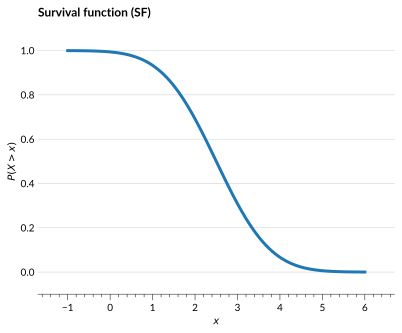

In [ ]:
plt.plot(x, s_n.sf(x))
plt.title("Survival function (SF)")
plt.xlabel(r"$x$")
plt.ylabel(r"$P(X > x)$")
#plt.savefig("../assets/primer-SF-norm.svg", transparent=True)

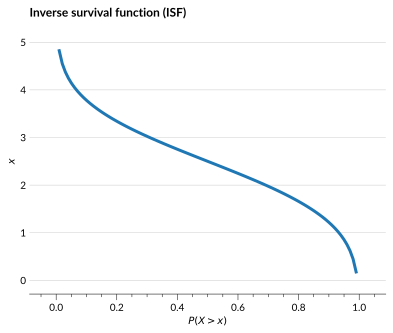

In [ ]:
plt.plot(p,s_n.isf(p))
plt.title("Inverse survival function (ISF)")
plt.xlabel(r"$P(X > x)$")
plt.ylabel(r"$x$")
#plt.savefig("../assets/primer-ISF-norm.svg", transparent=True)

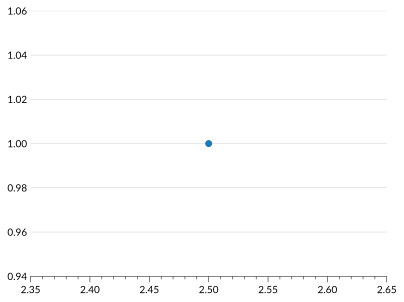

In [ ]:
plt.plot()

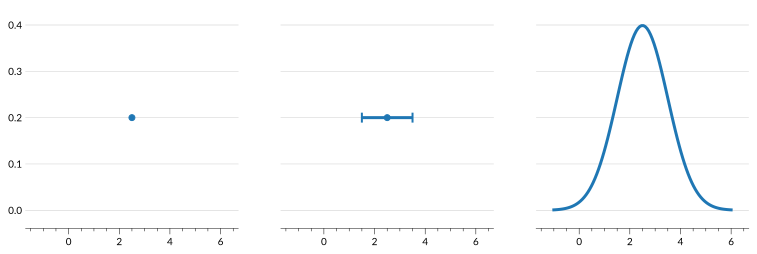

In [ ]:
fig, axes = plt.subplots(1,3,sharex=True,sharey=True, figsize=(13,4))
axes[0].scatter(s_n.mean(), 0.2)
axes[1].errorbar(s_n.mean(),0.2, xerr=s_n.std(),capsize=5., capthick=2,marker='o')
axes[2].plot(x,s_n.pdf(x))
#plt.savefig("../assets/primer-probability-dist-vs-point.svg",transparent=True)

In [5]:
ens_m = qp.mixmod.create_ensemble(means=np.array([[0.3, 0.8, 1.2],[0.5,2,10]]), stds=np.array([[0.1,0.15,0.3],[4,3,1.]]),weights=np.array([[0.4,0.2,0.3],[0.1,0.3,0.4]]))

In [6]:
bins = np.linspace(0,5,75)
pdfs = np.array([0,0.2,0.5,0.8,0.9,1.0,1.1, 1.15,1.1,1.0,0.9, 0.95,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.72,1.75,1.72,1.7,1.6,1.5,1.4,1.3,1.25,1.1,0.95,0.98,0.99,0.95,0.93,0.9,0.8,0.7,0.6,0.4,0.3,0.25,0.2,0.22,0.25,0.3,0.35,0.33,0.32,0.28,0.31,0.34,0.33,0.32,0.28,0.25,0.23,0.2,0.24,0.28,0.25,0.2,0.18,0.15,0.1,0.08,0.05,0.08,0.1,0.12,0.15,0.07,0.05,0.0])
len(pdfs)

74

In [7]:
ens_h2 = qp.hist.create_ensemble(bins=bins,pdfs=pdfs)

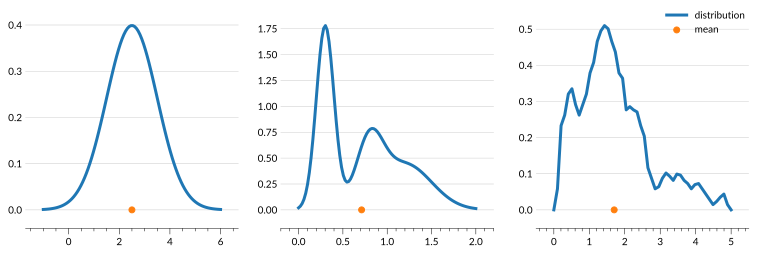

In [ ]:
x_vals = np.linspace(0,2,100)
x2 = np.linspace(0,5,50)
fig, axes = plt.subplots(1,3,figsize=(13,4))
axes[0].plot(x, s_n.pdf(x))
axes[0].scatter(s_n.mean(), 0., c="C1")
axes[1].plot(x_vals,ens_m[0].pdf(x_vals))
axes[1].scatter(ens_m[0].mean(),0, c="C1")
axes[2].plot(x2,ens_h2.pdf(x2), label="distribution")
axes[2].scatter(ens_h2.mean(),0., c="C1", label="mean")
plt.legend(loc="best")
#axes[2].annotate('mean', xy=(ens_h2.mean()+0.2,0))
#plt.savefig("../assets/primer-complex-distributions.svg",transparent=True)

In [8]:
ens_h = qp.convert(ens_n, "hist", bins=np.linspace(-1,6,25))

In [18]:
quants = np.linspace(0.001,0.999,10)
ens_q = qp.convert(ens_n, "quant", quants=quants)

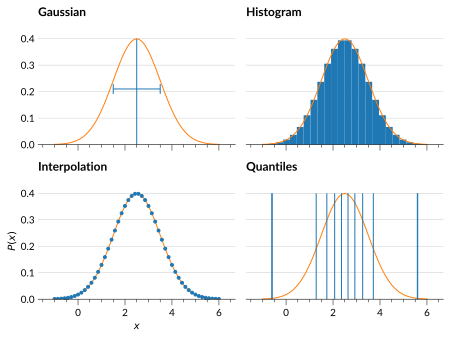

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
new_x = np.linspace(-1, 6, 50)

# mean and std
axes[0][0].vlines(ens_n.mean(),ymin=0,ymax=0.4,linewidth=1)
axes[0][0].errorbar(ens_n.mean(), 0.21,xerr = ens_n.std(), linewidth=1, capsize=5., capthick=1)
axes[0][0].plot(x, ens_n.pdf(x), color="C1",linewidth=1)
axes[0][0].set_title("Gaussian")

# hist
axes[0][1].bar(ens_h.x_samples(), ens_h.objdata["pdfs"], width=ens_h.metadata["bins"][1]-ens_h.metadata["bins"][0])
axes[0][1].plot(x, ens_n.pdf(x), color="C1", linewidth=1)
axes[0][1].set_title("Histogram")


#x and y
axes[1][0].plot(x, ens_n.pdf(x), color="C1", linewidth=1)
axes[1][0].plot(new_x, ens_n.pdf(new_x), '.')
axes[1][0].set_title("Interpolation")

axes[1][0].set_xlabel(r"$x$")
axes[1][0].set_ylabel(r"$P(x)$")

# quantiles
axes[1][1].plot(x,ens_n.pdf(x),color="C1",linewidth=1)
axes[1][1].vlines(ens_q.objdata["locs"], ymin = 0, ymax = 0.4, linewidth=1)
# axes[1][1].plot(x,ens_n.cdf(x),color="C1",linewidth=1)
# axes[1][1].plot(ens_q.objdata["locs"],ens_q.metadata["quants"], '.')
# axes[1][1].set_xlabel(r"$x$")
axes[1][1].set_title("Quantiles")

# y labels
# axes[0][0].set_ylabel(r"$P(x)$")
# axes[0][1].set_ylabel(r"$P(x)$")
# axes[1][1].set_ylabel(r"$P(X \leq x)$")
fig.tight_layout()

#plt.savefig("../assets/primer-parameterizations.svg",transparent=True)

In [40]:
ens_q.metadata["quants"]

array([0.        , 0.001     , 0.11188889, 0.22277778, 0.33366667,
       0.44455556, 0.55544444, 0.66633333, 0.77722222, 0.88811111,
       0.999     , 1.        ])

In [37]:
ens_q.objdata["locs"]

array([-0.6072351 , -0.59023231,  1.27818548,  1.73043093,  2.06192695,
        2.35043917,  2.62678431,  2.91337303,  3.23957889,  3.67554242,
        4.82634787,  4.93107233])

In [8]:
# plot for histogram parameterization

bins = np.linspace(0,5, 15)
pdfs= np.array([0.1, 0.25,0.35,0.45,0.5,0.48,0.35,0.25,0.27,0.2,0.23,0.2,0.1,0.05])
ens_h3 = qp.hist.create_ensemble(bins,pdfs)

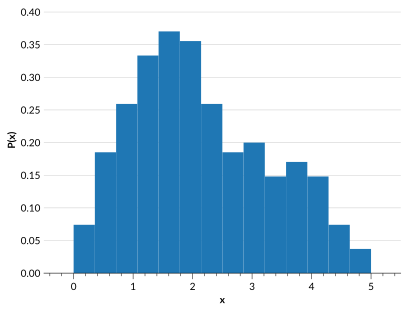

In [10]:
plt.bar(ens_h3.x_samples(),ens_h3.pdf(ens_h3.x_samples()),width=ens_h3.x_samples()[1]-ens_h3.x_samples()[0])
plt.xlabel("x")
plt.ylabel("P(x)")
plt.savefig("../assets/hist-example.svg",transparent=True)

In [2]:
ens_n2 = qp.stats.norm.create_ensemble({"loc": np.array([2.5, 3.5]), "scale": np.array([1.,0.85])})
quants = np.linspace(0.001,0.999,10)
ens_q2 = qp.convert(ens_n2, "quant", quants=quants)

In [7]:
ens_q2.x_samples()

array([-0.6071293 , -0.30039342,  0.00634245,  0.31307832,  0.61981419,
        0.92655007,  1.23328594,  1.54002181,  1.84675769,  2.15349356,
        2.46022943,  2.7669653 ,  3.07370118,  3.38043705,  3.68717292,
        3.99390879,  4.30064467,  4.60738054,  4.91411641,  5.22085228,
        5.52758816,  5.83432403,  6.1410599 ])

In [4]:
ens_q2.objdata["locs"]

array([[-0.6071293 , -0.59023231,  1.28345605,  1.73715452,  2.07018928,
         2.36057094,  2.63942906,  2.92981072,  3.26284548,  3.71654395,
         5.59023231,  5.6071293 ],
       [ 0.8589401 ,  0.87330254,  2.46593764,  2.85158134,  3.13466089,
         3.3814853 ,  3.6185147 ,  3.86533911,  4.14841866,  4.53406236,
         6.12669746,  6.1410599 ]])

In [5]:
np.min(np.diff(ens_q2.objdata["locs"][0]))

np.float64(0.016896989144129293)

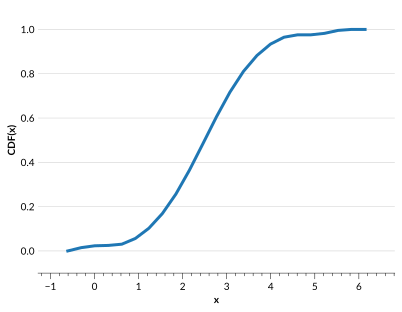

In [8]:
plt.plot(ens_q2.x_samples(), ens_q2[0].cdf(ens_q2.x_samples()))
plt.xlabel("x")
plt.ylabel("CDF(x)")
plt.savefig("../assets/cookbook-plotting-quant.svg",bbox_inches="tight")